In [19]:
# Librerias

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

#%config InlineBackend.figure_format = 'svg'

In [20]:
# Abrir dataset churn

df = pd.read_csv("telecom_churn.csv")

# Verificar el dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
# Reviso las caracteristicas del dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [22]:
# Churn es la variable que queremos predecir, churn es cuando un cliente se va de la compañia
# La ultima columna es la que queremos predecir, es decir, si el cliente se va o no

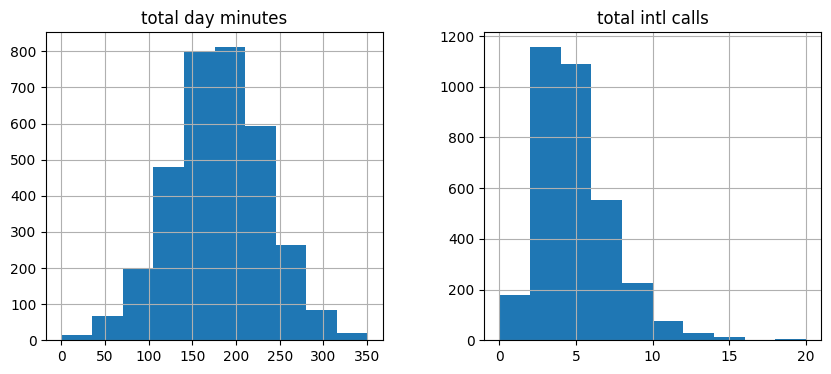

In [23]:
# Exploracion de datos
# Genero un histograma de la variable total day minutes para ver la distribucion de los datos

features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4));

<Axes: xlabel='total intl calls', ylabel='Count'>

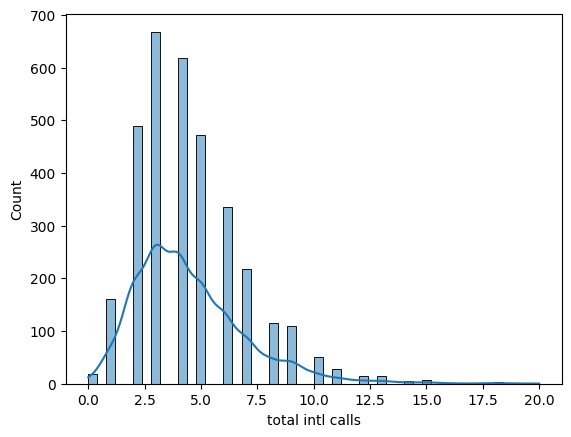

In [24]:
# Histograma con la densidad de las variables

sns.histplot(df['total intl calls'], kde=True)

In [25]:
# Resumen estadistico de las variables

df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [26]:
# Si revisamos la variable objetico churn, podemos ver que es un dataset desbalanceado

df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

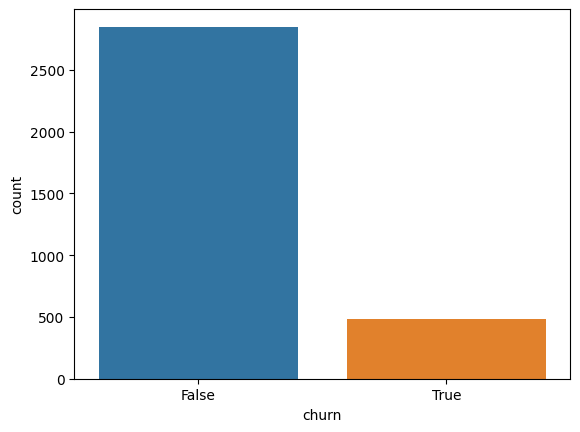

In [27]:
# Grafico de barras de la variable churn
sns.countplot(x='churn', data = df)

In [28]:
# Seleccionamos las variables numericas
numerical = list(df.dtypes[df.dtypes != 'object'].index)

# Matriz de correlacion
corr_matrix = df[numerical].corr()
corr_matrix

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


<Axes: >

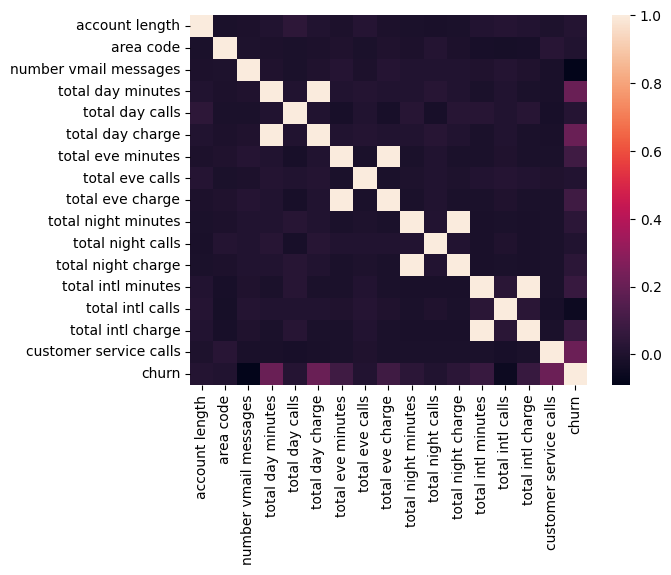

In [29]:
# Grafico de correlacion
sns.heatmap(corr_matrix)

In [30]:
# Existen 4 variables que estan altamente correlacionadas, por lo que podemos eliminarlas
# total day charge, total eve charge, total night charge, total intl charge, dependen de total day calls, total eve calls, total night calls, total intl calls 

In [31]:
# Eliminamos las variables que estan altamente correlacionadas
# Copiamos el dataset
df2 = df.copy()

# Eliminamos las variables
df2.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)

# Nueva matriz de correlacion
numerical2 = df2.dtypes[df2.dtypes != 'object'].index
corr_matrix2 = df2[numerical2].corr()
corr_matrix2

,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,-0.006757,0.019260,-0.008955,-0.013176,0.009514,0.020661,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,0.003580,-0.011886,-0.005825,0.016522,-0.018288,-0.024179,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.017562,-0.005864,0.007681,0.007123,0.002856,0.013957,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,0.007043,0.015769,0.004323,0.022972,-0.010155,0.008033,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,-0.021451,0.006462,0.022938,-0.019557,0.021565,0.004574,-0.018942,0.018459
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,1.000000,-0.011430,-0.012584,0.007586,-0.011035,0.002541,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,-0.011430,1.000000,-0.002093,0.007710,0.008703,0.017434,0.002423,0.009233
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,-0.012584,-0.002093,1.000000,0.011204,-0.015207,-0.012353,-0.009288,0.035493
total night calls,-0.013176,0.016522,0.007123,0.022972,-0.019557,0.007586,0.007710,0.011204,1.000000,-0.013605,0.000305,-0.012802,0.006141
total intl minutes,0.009514,-0.018288,0.002856,-0.010155,0.021565,-0.011035,0.008703,-0.015207,-0.013605,1.000000,0.032304,-0.009640,0.068239


<Axes: >

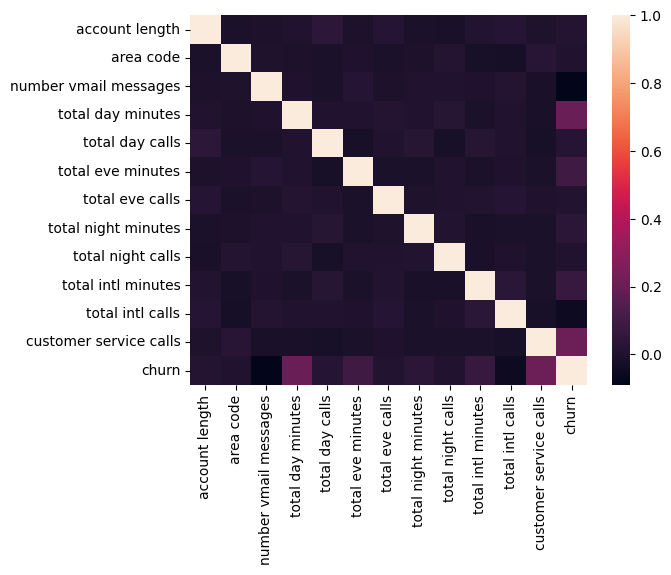

In [32]:
# Grafico de correlacion
sns.heatmap(corr_matrix2)

In [33]:
# Vamos implementar un modelo de clasificacion para predecir si un cliente se va o no
# Primero vamos a dividir el dataset en train y test



In [34]:
# Convertimos las variables categoricas a numericas
df2['international plan'] = pd.factorize(df2['international plan'])[0]
df2['voice mail plan'] = pd.factorize(df2['voice mail plan'])[0]
df2['state'] = pd.factorize(df2['state'])[0]
df2['churn'] = pd.factorize(df2['churn'])[0]

# Eliminamos la variable phone number
df2.drop(['phone number'], axis=1, inplace=True)


In [35]:
# Imprimimos el dataset para verificar que las variables categoricas se convirtieron a numericas
df2.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0,128,415,0,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,1,107,415,0,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,2,137,415,0,1,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,1,84,408,1,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,3,75,415,1,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [36]:
# Utilizamos la libreria sklearn
from sklearn.model_selection import train_test_split

# Definimos las variables independientes y dependientes
X = df2.drop('churn', axis=1)
y = df2['churn']

In [37]:
# Dividimos el dataset en train y test
# 70% train y 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Verificamos el tamaño de los datasets
print("X_train tiene {} registros".format(X_train.shape[0]), "y {} variables".format(X_train.shape[1]))
print("X_test tiene {} registros".format(X_test.shape[0]), "y {} variables".format(X_test.shape[1]))
print("y_train tiene {} registros".format(y_train.shape[0]))
print("y_test tiene {} registros".format(y_test.shape[0]))


X_train tiene 2333 registros y 15 variables
X_test tiene 1000 registros y 15 variables
y_train tiene 2333 registros
y_test tiene 1000 registros


In [38]:
# Un ejemplo de como se ve el dataset de entrenamiento
X_train.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
2196,1,132,415,0,0,10,182.9,54,292.4,68,142.3,116,11.5,4,0
2069,32,53,408,0,1,0,261.2,119,250.8,105,176.0,112,9.8,2,0
1084,44,111,415,0,1,0,255.9,97,204.1,129,171.3,84,12.3,5,3
1836,5,112,415,0,0,17,183.2,95,252.8,125,156.7,95,9.7,3,0
2805,0,166,415,1,0,28,175.8,126,253.6,76,128.5,72,11.4,5,1


In [39]:
# Ejemplo de la variable dependiente
y_train.head()

2196    0
2069    1
1084    0
1836    0
2805    0
Name: churn, dtype: int64

In [40]:
# Implementamos un modelo de regresion logistica

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model_reglog = LogisticRegression(max_iter=10000)
model_reglog.fit(X_train, y_train)

# Predecimos los valores de test
y_pred = model_reglog.predict(X_test)

# Evaluamos el modelo
reglog_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", reglog_acc)

Accuracy:  0.847


<Axes: >

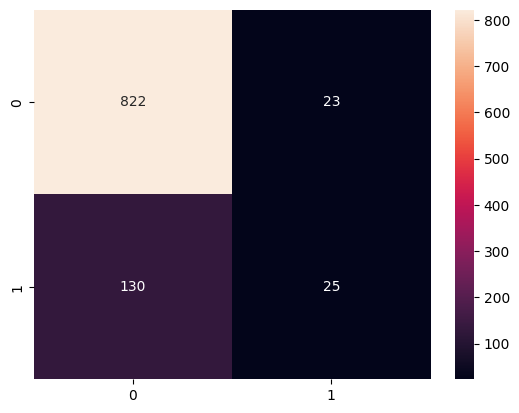

In [41]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [42]:
# Implementamos un modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Predecimos los valores de test
y_pred = model_tree.predict(X_test)

# Evaluamos el modelo
tree_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", tree_acc)


Accuracy:  0.897


<Axes: >

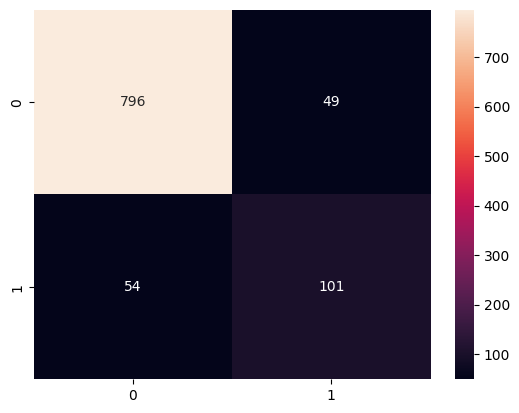

In [43]:
# Matriz de confusion
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [44]:
# Implementamos un modelo de random forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predecimos los valores de test
y_pred = model_rf.predict(X_test)

# Evaluamos el modelo
rf_acc = accuracy_score(y_test, y_pred) 
print("Accuracy: ", rf_acc)

Accuracy:  0.935


<Axes: >

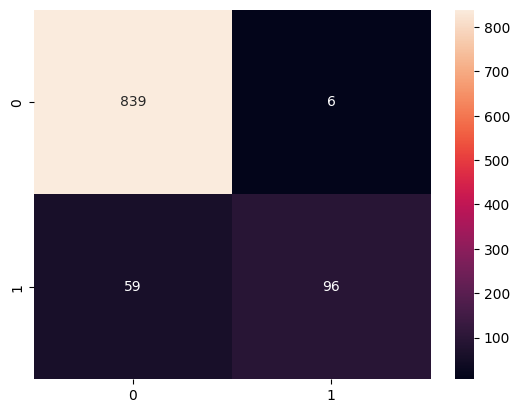

In [45]:
# Matriz de confusion
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [46]:
# Implementamos un modelo de gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

# Predecimos los valores de test

y_pred = model_gb.predict(X_test)

# Evaluamos el modelo
gb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", gb_acc)

Accuracy:  0.945


<Axes: >

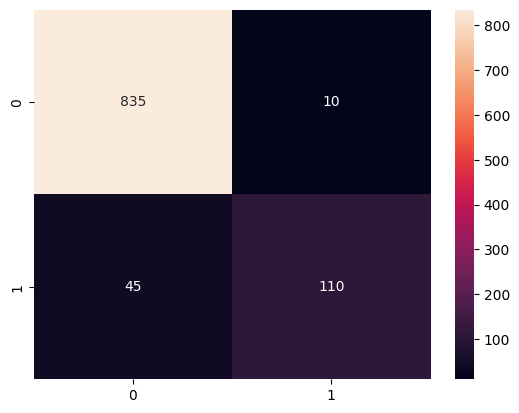

In [47]:
# Matriz de confusion
confusion_matrix(y_test, y_pred)

# Grafico de la matriz de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [48]:
# Realzaamos la prediccion ingresando los valores de las variables
# Vamos a ingresar los valores de las variables de un cliente para predecir si se va o no

# Definimos las 15 variables independientes numericas con valores aleatorios en el rango de cada variable

state = np.random.randint(0, 51)
account_length = np.random.randint(1, 100)
area_code = np.random.randint(0, 3)
international_plan = np.random.randint(0, 2)
voice_mail_plan = np.random.randint(0, 2)
number_vmail_messages = np.random.randint(0, 51)
total_day_minutes = np.random.randint(0, 300)
total_day_calls = np.random.randint(0, 200)
total_eve_minutes = np.random.randint(0, 300)
total_eve_calls = np.random.randint(0, 200)
total_night_minutes = np.random.randint(0, 300)
total_night_calls = np.random.randint(0, 200)
total_intl_minutes = np.random.randint(0, 300)
total_intl_calls = np.random.randint(0, 200)
customer_service_calls = np.random.randint(0, 11)


# Imprimimos los valores de las variables
print("state: ", state)
print("account_length: ", account_length)
print("area_code: ", area_code)
print("international_plan: ", international_plan)
print("voice_mail_plan: ", voice_mail_plan)
print("number_vmail_messages: ", number_vmail_messages)
print("total_day_minutes: ", total_day_minutes)
print("total_day_calls: ", total_day_calls)
print("total_eve_minutes: ", total_eve_minutes)
print("total_eve_calls: ", total_eve_calls)
print("total_night_minutes: ", total_night_minutes)
print("total_night_calls: ", total_night_calls)
print("total_intl_minutes: ", total_intl_minutes)
print("total_intl_calls: ", total_intl_calls)
print("customer_service_calls: ", customer_service_calls)

# Creamos un diccionario con los valores de las variables
data = {'state': [state], 'account length': [account_length], 'area code': [area_code], 'international plan': [international_plan], 'voice mail plan': [voice_mail_plan], 'number vmail messages': [number_vmail_messages], 'total day minutes': [total_day_minutes], 'total day calls': [total_day_calls], 'total eve minutes': [total_eve_minutes], 'total eve calls': [total_eve_calls], 'total night minutes': [total_night_minutes], 'total night calls': [total_night_calls], 'total intl minutes': [total_intl_minutes], 'total intl calls': [total_intl_calls], 'customer service calls': [customer_service_calls]}
df_pred = pd.DataFrame(data)

state:  26
account_length:  21
area_code:  1
international_plan:  1
voice_mail_plan:  1
number_vmail_messages:  39
total_day_minutes:  106
total_day_calls:  51
total_eve_minutes:  283
total_eve_calls:  166
total_night_minutes:  20
total_night_calls:  157
total_intl_minutes:  110
total_intl_calls:  2
customer_service_calls:  9


In [49]:
# Predecimos si se va o no con el modelo de regresion logistica
y_pred = model_reglog.predict(df_pred)

# Imprimimos el resultado
print("Con Regresion logistica")

if y_pred == 0:
    print("El cliente no se va")
else:
    print("El cliente se va")

Con Regresion logistica
El cliente se va


In [50]:
# Predecimos si se va o no con el modelo de arbol de decision
y_pred = model_tree.predict(df_pred)

# Imprimimos el resultado
print("Con Arbol de decision")

if y_pred == 0:
    print("El cliente no se va")
else:
    print("El cliente se va")
    

Con Arbol de decision
El cliente no se va


In [51]:
# Predecimos si se va o no con el modelo de random forest
y_pred = model_rf.predict(df_pred)

# Imprimimos el resultado
print("Con Random Forest")

if y_pred == 0:
    print("El cliente no se va")
else:
    print("El cliente se va")

Con Random Forest
El cliente se va


In [52]:
# Predecimos si se va o no con el modelo de gradient boosting
y_pred = model_gb.predict(df_pred)

# Imprimimos el resultado
print("Con Gradient Boosting")

if y_pred == 0:
    print("El cliente no se va")
else:
    print("El cliente se va")
    

Con Gradient Boosting
El cliente se va


In [53]:
# guardamos los modelos
import pickle

pickle.dump(model_reglog, open('model_reglog.pkl', 'wb'))
pickle.dump(model_tree, open('model_tree.pkl', 'wb'))
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))
pickle.dump(model_gb, open('model_gb.pkl', 'wb'))


In [54]:
# Cargamos los modelos
model_reglog = pickle.load(open('model_reglog.pkl', 'rb'))
model_tree = pickle.load(open('model_tree.pkl', 'rb'))
model_rf = pickle.load(open('model_rf.pkl', 'rb'))
model_gb = pickle.load(open('model_gb.pkl', 'rb'))
